In [44]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [7]:
duplicates_apps = pd.read_csv(r"C:\Users\Hovarthanvishnu\Downloads\Andrid_Apps.csv.csv")
apps = duplicates_apps.drop_duplicates()
print('Total number of apps in the dataset = ', len(apps))
apps.sample(5)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3054,3834,Compass,MAPS_AND_NAVIGATION,4.3,286454,3.7,"10,000,000+",Free,0,Everyone,Maps & Navigation,"August 9, 2016",2.1.2,2.3 and up
7575,8683,Profile pictures for WhatsApp,PERSONALIZATION,4.7,10786,9.4,"500,000+",Free,0,Mature 17+,Personalization,"May 20, 2018",2.3.1,4.3 and up
3773,4692,The Grand Bike V,FAMILY,3.8,3478,95.0,"1,000,000+",Free,0,Everyone,Simulation,"February 24, 2018",4,4.1 and up
3816,4743,weather HD,PERSONALIZATION,4.0,1546,4.5,"10,000+",Paid,$1.99,Everyone,Personalization,"February 26, 2014",3.1,2.1 and up
8524,9663,EO Hub,BUSINESS,NaN,0,5.2,50+,Free,0,Teen,Business,"February 6, 2018",3.5.4,4.1 and up


In [ ]:
#Data Cleaning

In [9]:
remove = ['+', ',','$']
col_clean = ['Installs','Price']
for col in col_clean:
    for char in remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


In [ ]:
#Correcting Data types

In [13]:
apps['Installs'] = apps['Installs'].astype('float')
apps['Price'] = apps['Price'].astype('float')
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [ ]:
#Category Exploration
#Print the total number of unique categories

Number of categories =  33


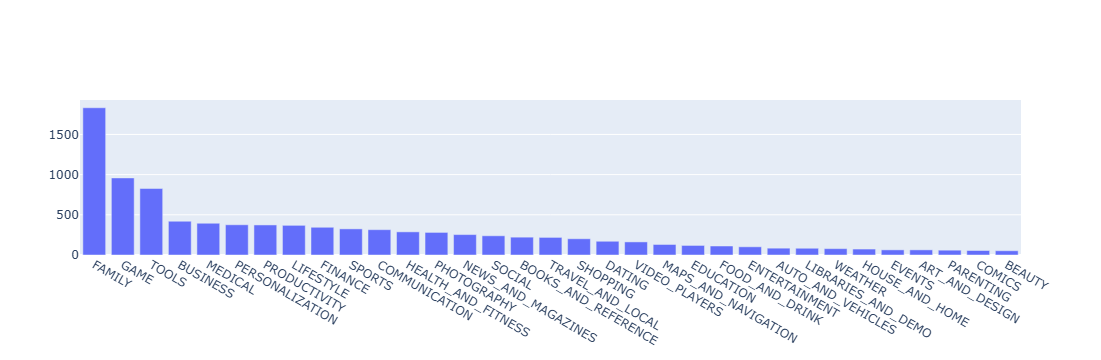

In [19]:
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)
num_apps = apps['Category'].value_counts()
sorted_num_apps = num_apps.sort_values(ascending = False)
data = [go.Bar(
        x = num_apps.index,
        y = num_apps.values, 
)]
plotly.offline.iplot(data)

In [ ]:
#Metric Analysis

In [21]:
avg_app_rating = apps['Rating'].mean()
print('Average app rating from the dataset = ', avg_app_rating)

Average app rating from the dataset =  4.173243045387994


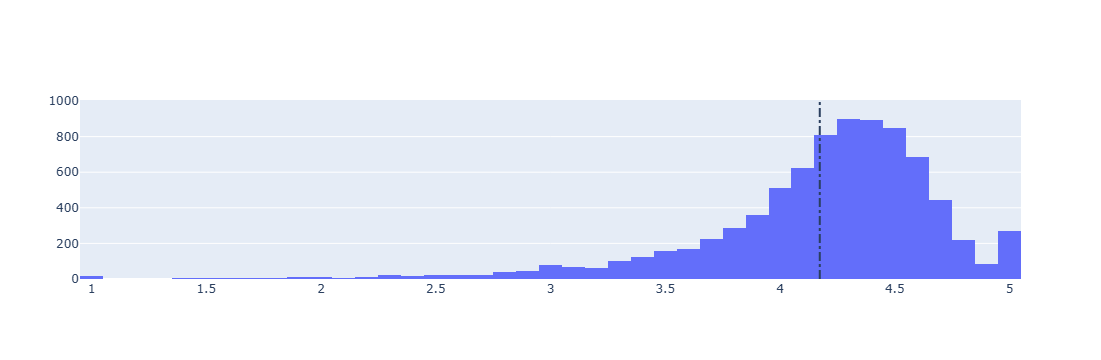

In [23]:
data = [go.Histogram(
        x = apps['Rating']
)]
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

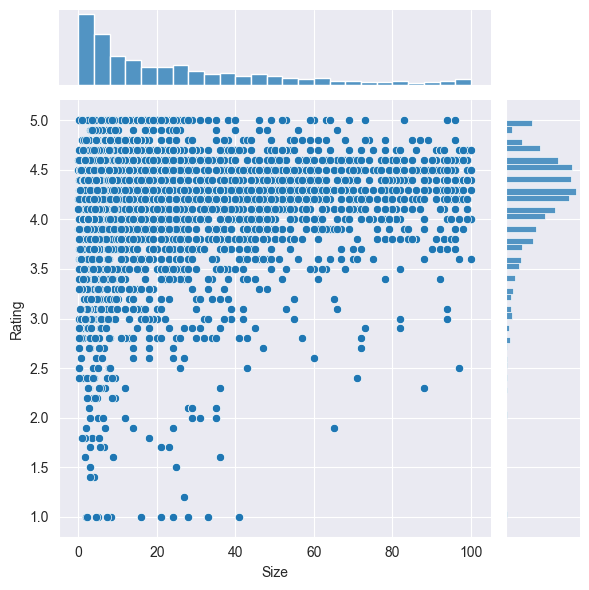

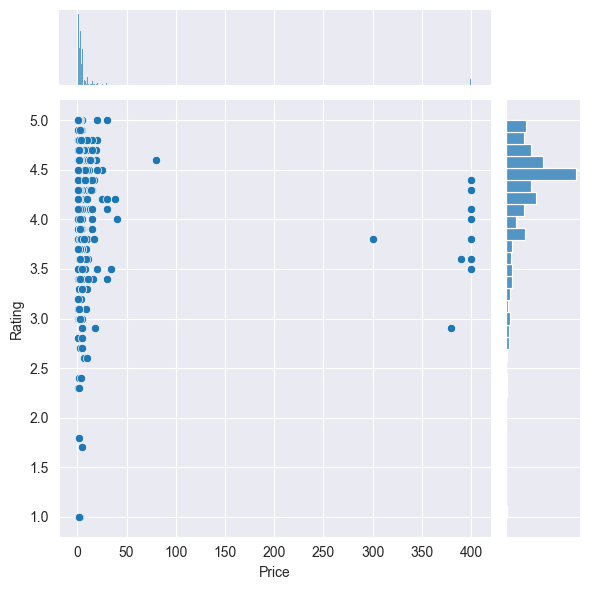

In [58]:
apps_size_and_rating_present = apps[(apps['Rating'].isnull() == False) & (apps['Size'].isnull() == False)]
large_categories = apps_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])
paid_apps = apps_size_and_rating_present[apps_size_and_rating_present['Type'] == 'Paid']
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])
plt.show()

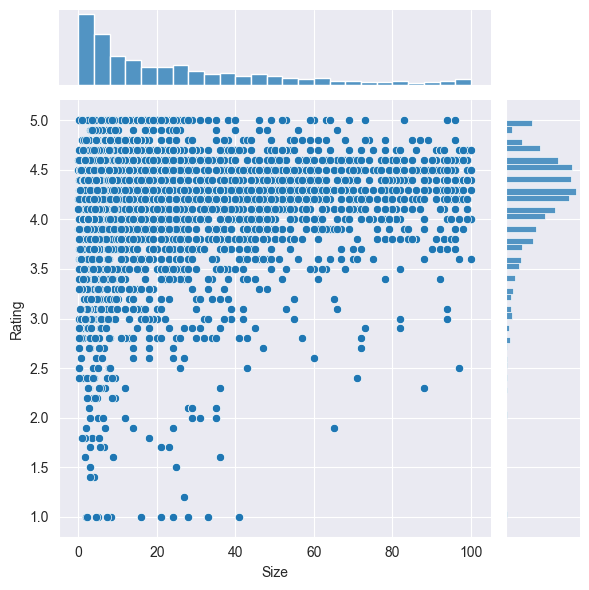

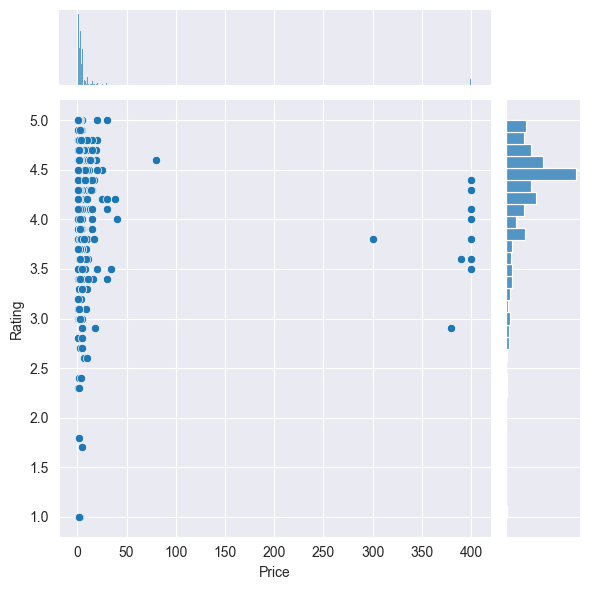

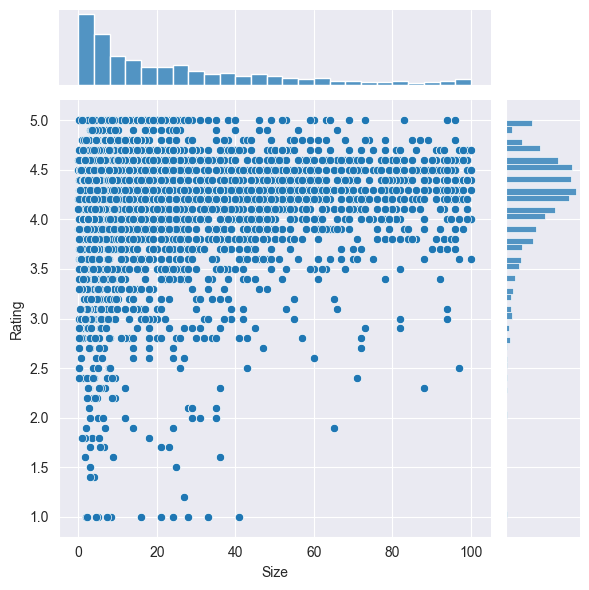

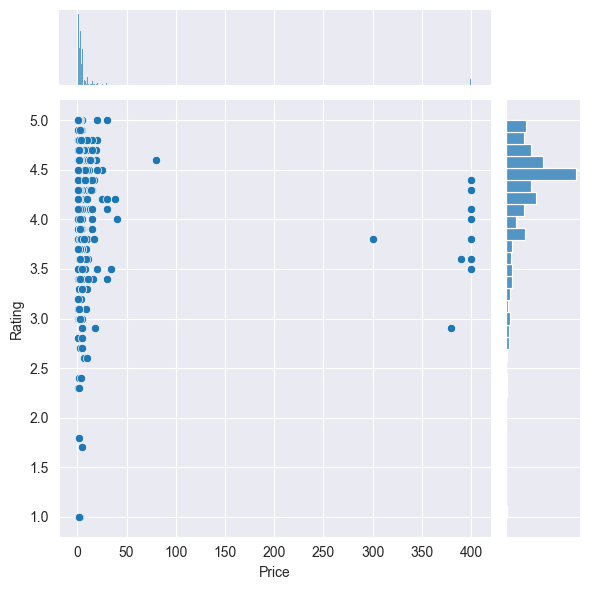

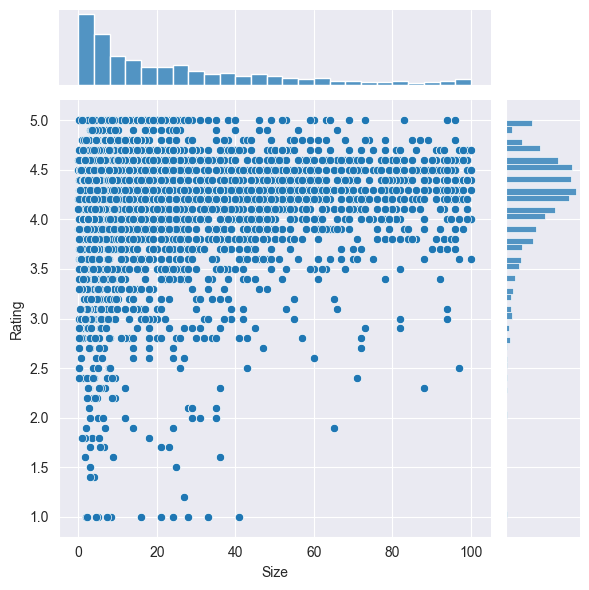

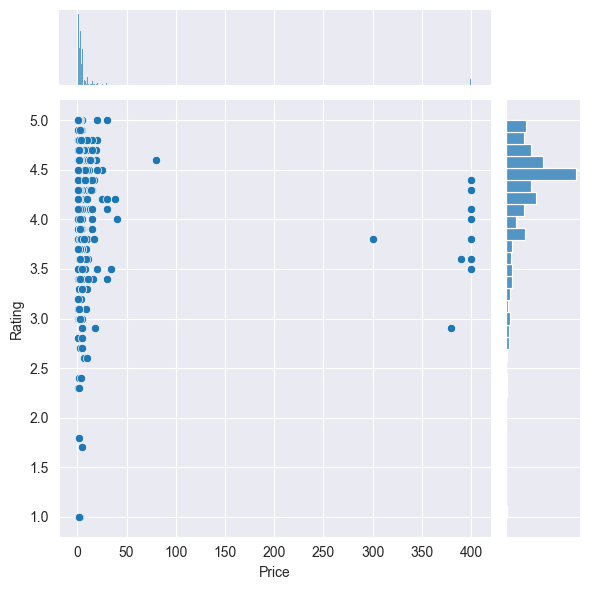

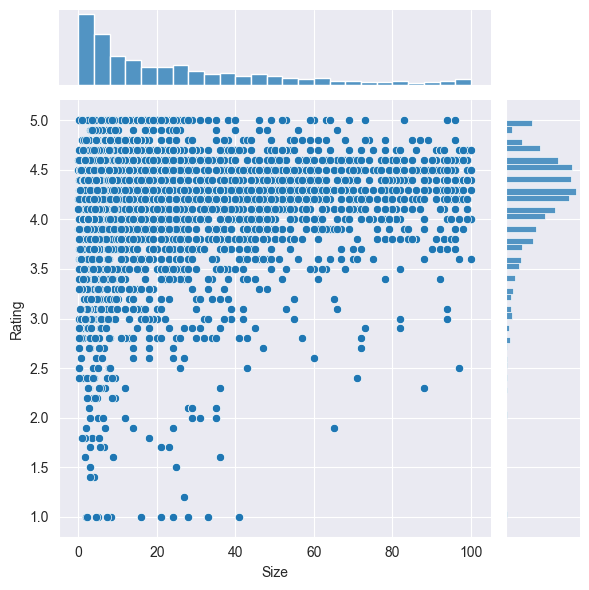

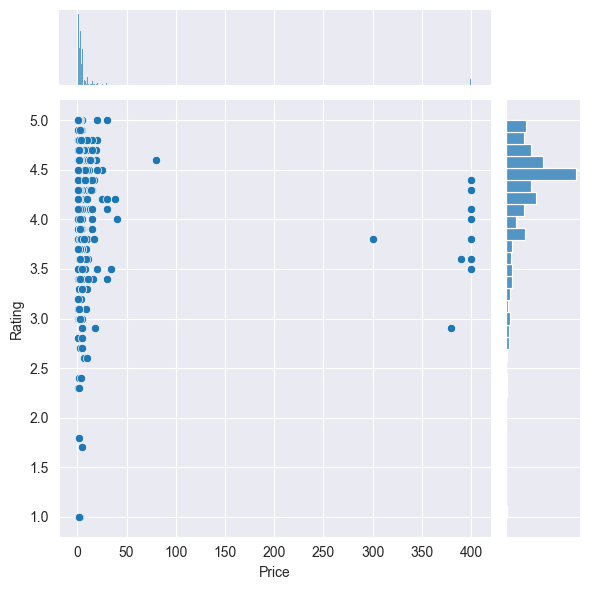

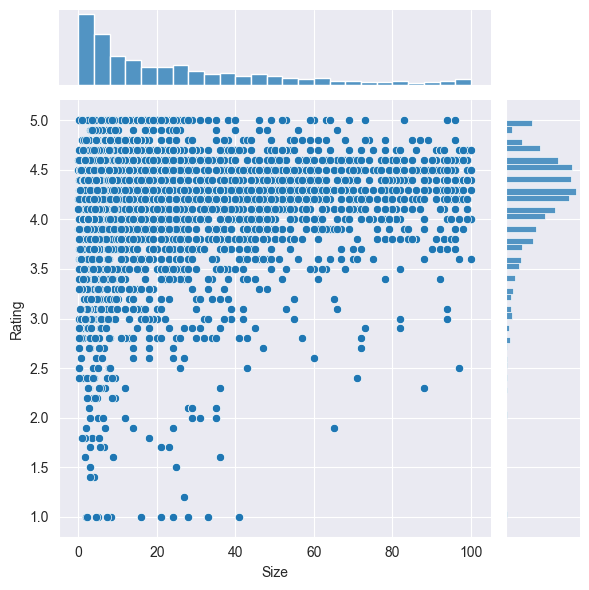

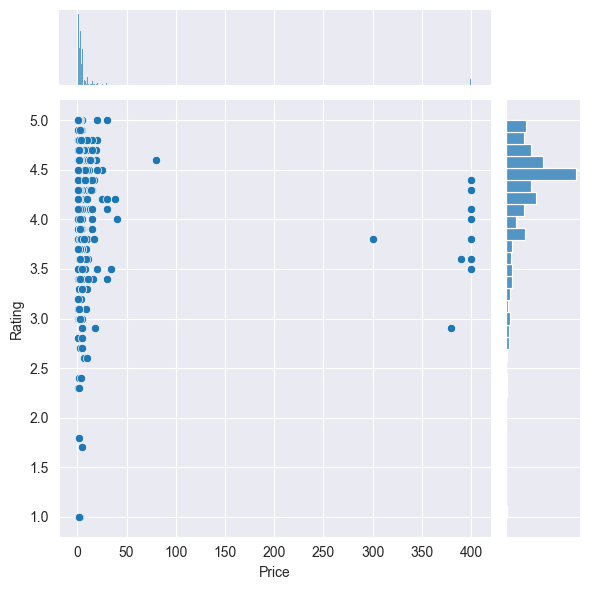

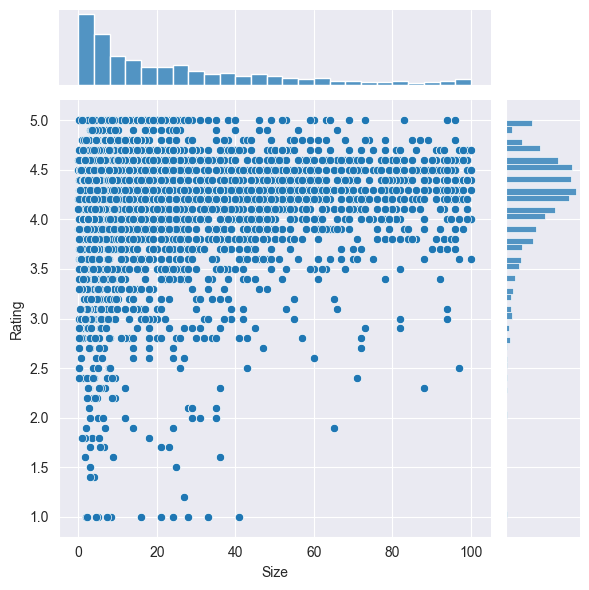

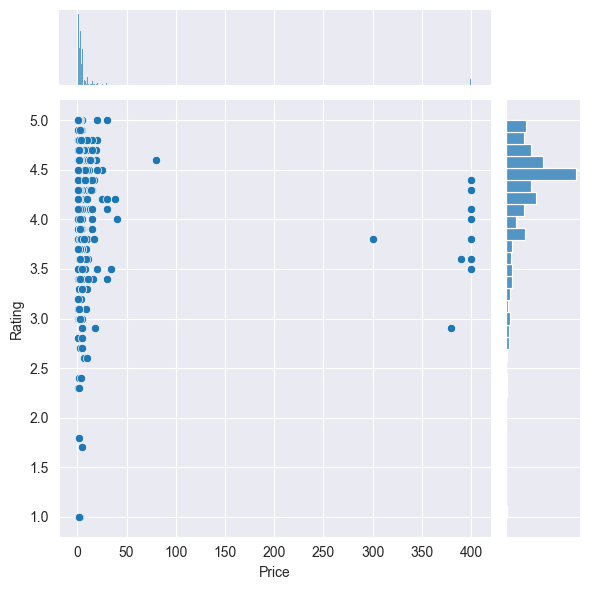

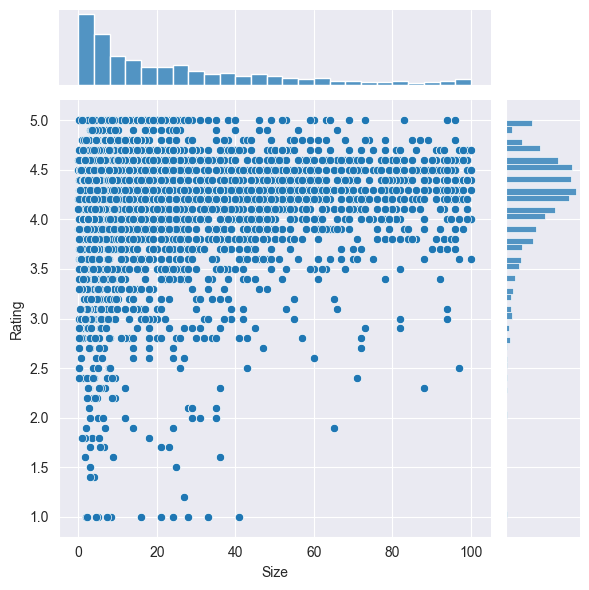

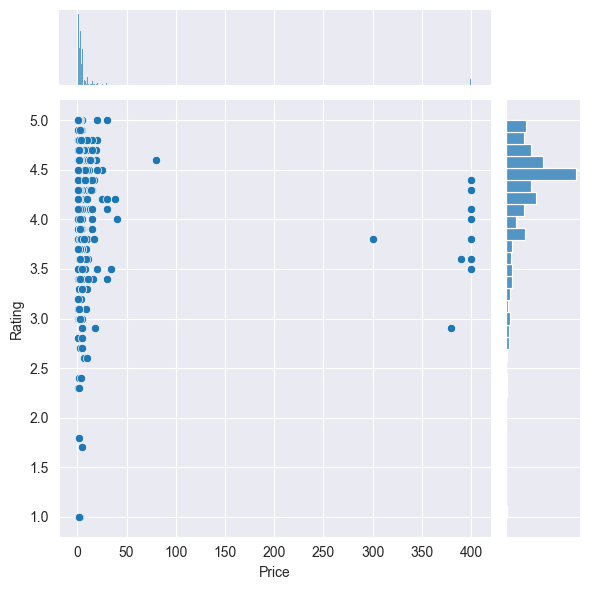

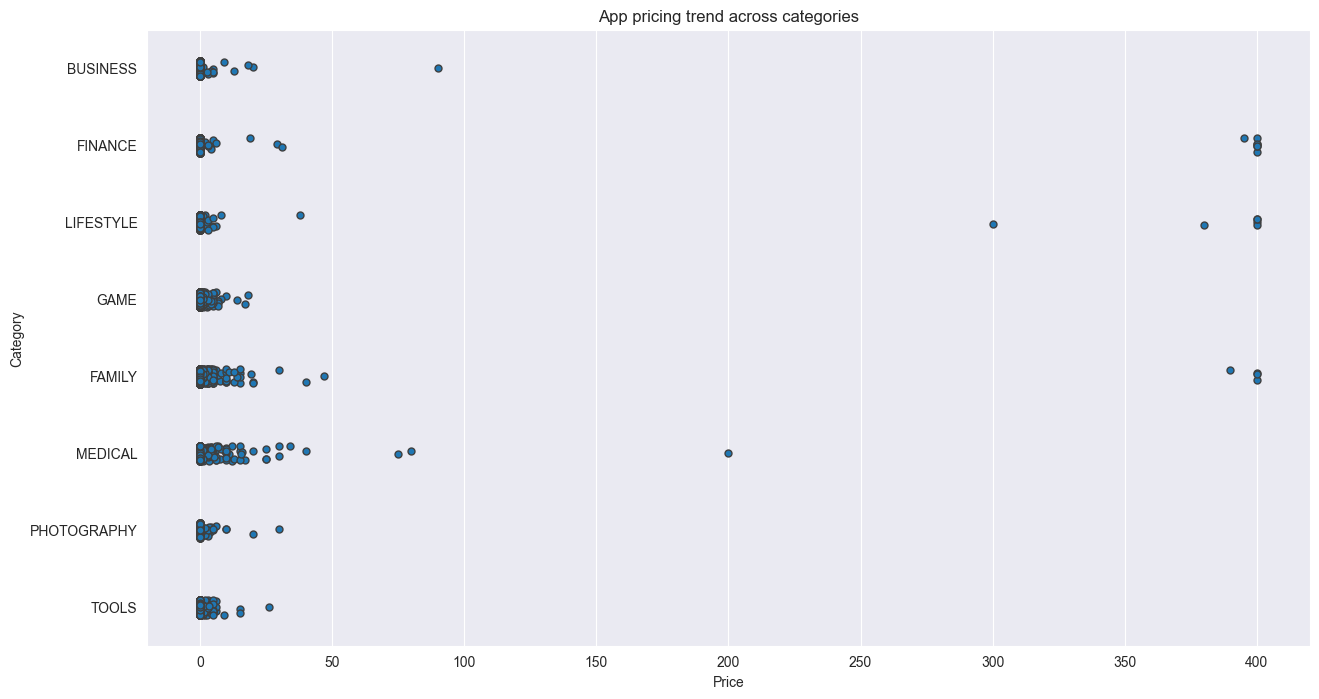

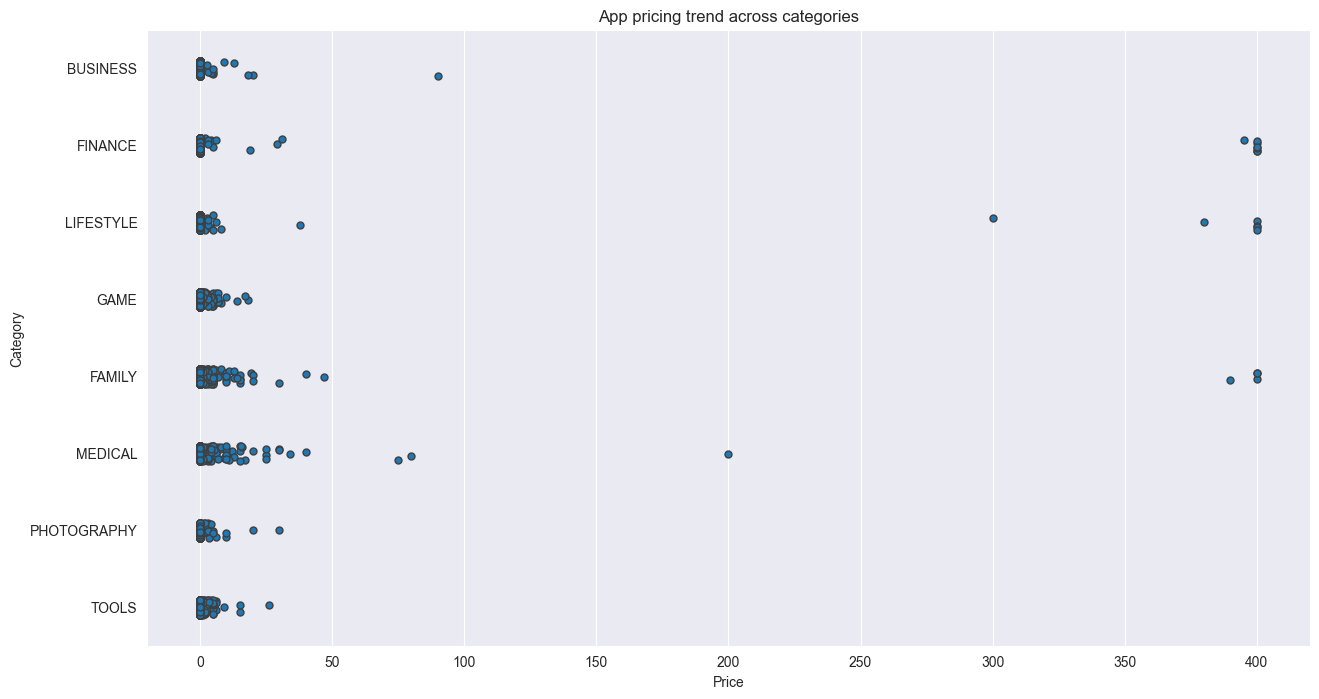

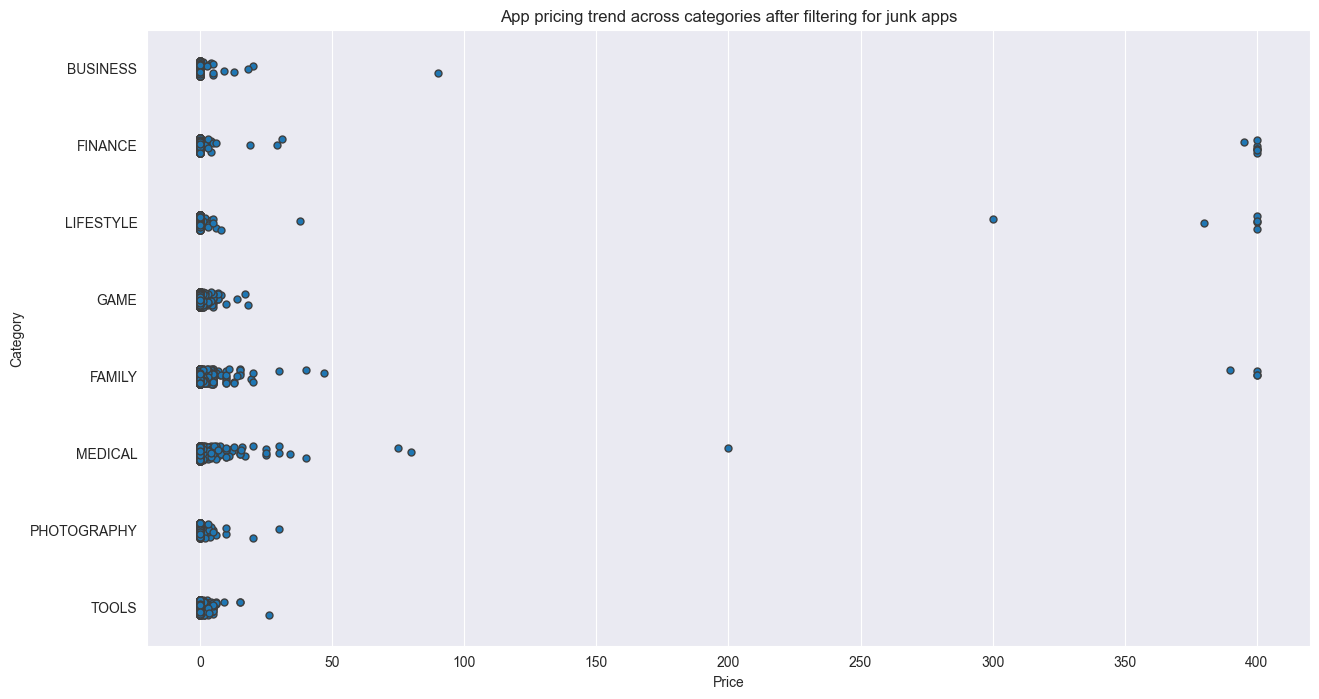

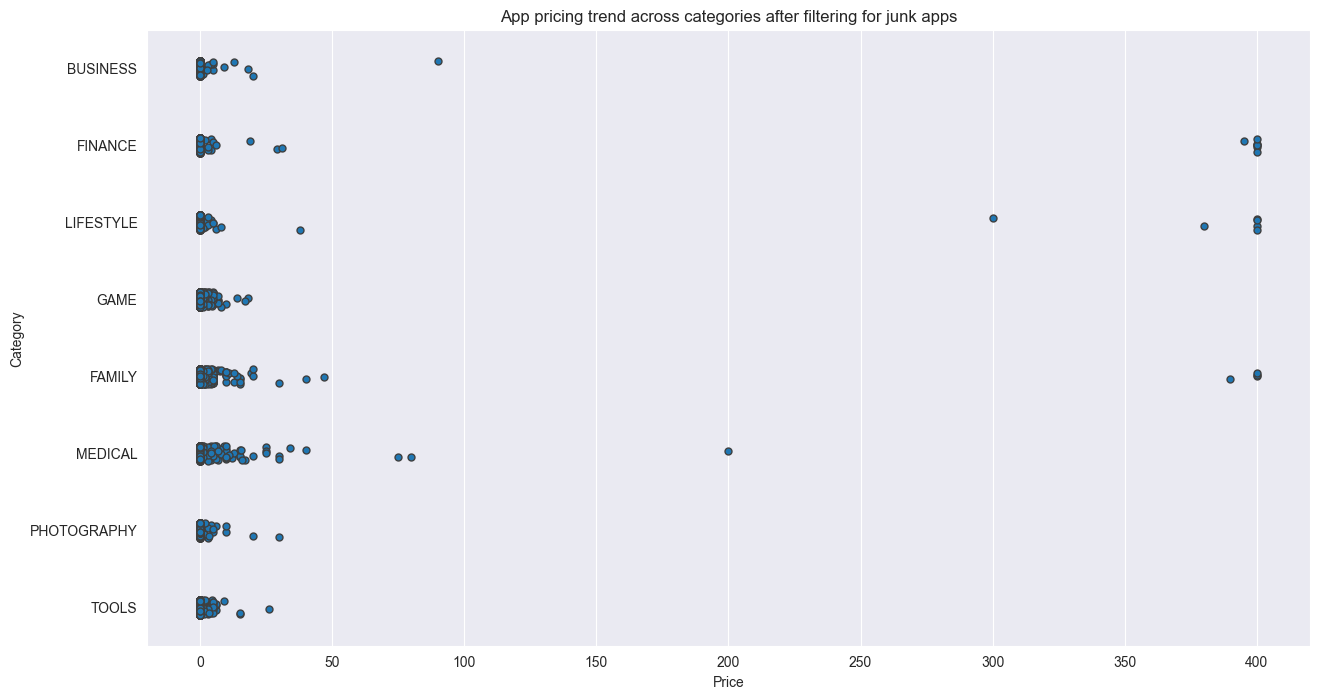

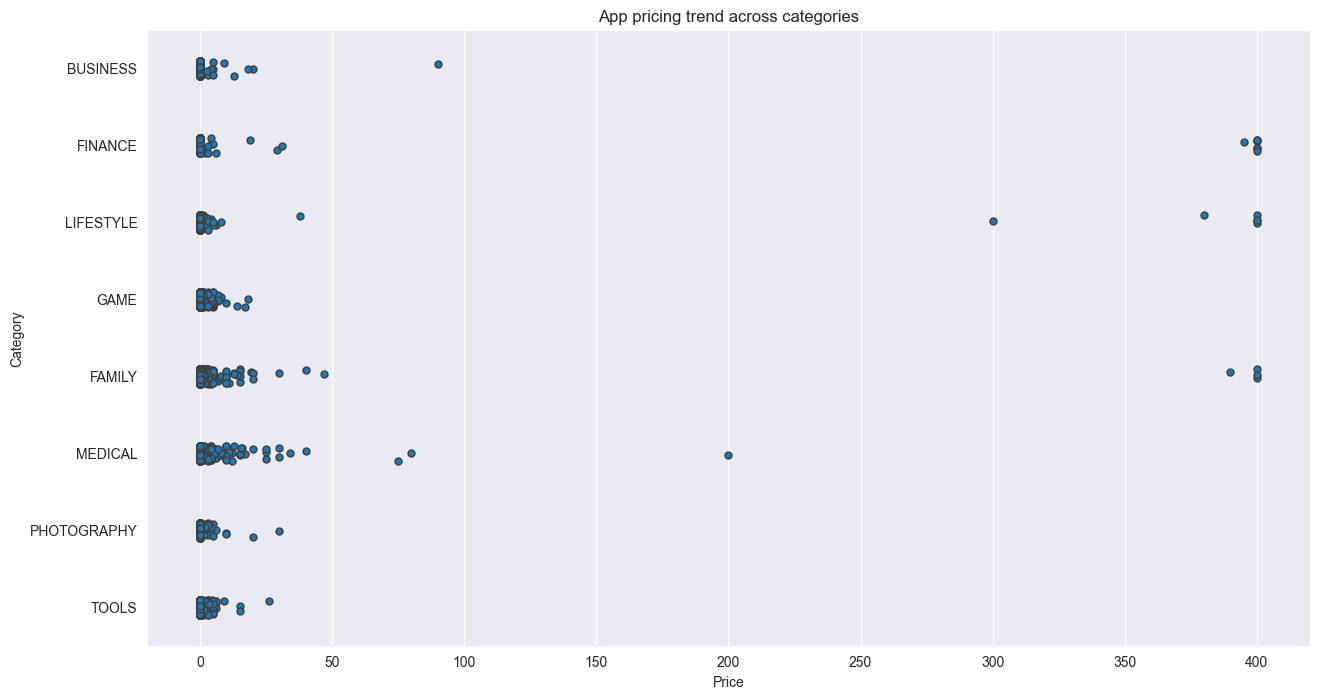

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
popular_app = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

ax = sns.stripplot(x = popular_app['Price'], y = popular_app['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

apps_above_200 = popular_app[popular_app['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]
plt.show()

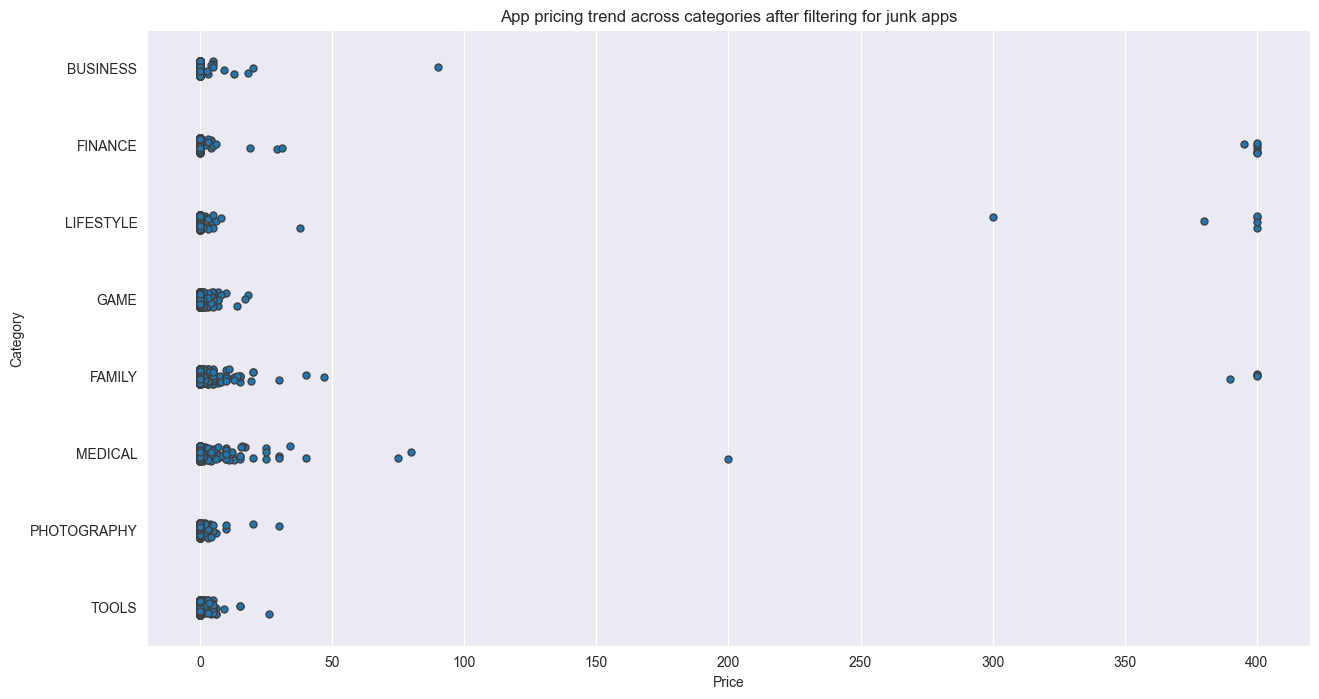

In [60]:
apps_under_100 = popular_app[popular_app['Price'] < 100]
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.stripplot(x = popular_app['Price'], y = popular_app['Category'], data = apps, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')
plt.show()

In [ ]:
#Interactive Visualisation

In [62]:
apps['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
# Data for paid apps

In [64]:
trace0 = go.Box(
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

In [ ]:
# Data for free apps

In [66]:
trace1 = go.Box(
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

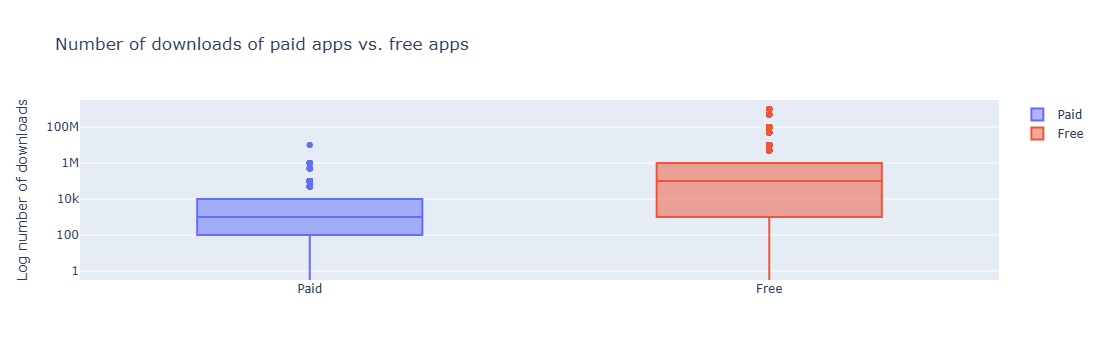

In [68]:
layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [ ]:
#Sentiment analysis of user reviews

In [70]:
apps.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [74]:
reviews = pd.read_csv(r"C:\Users\Hovarthanvishnu\Downloads\users review.csv.csv")
reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [80]:
merged_df = pd.merge(apps, reviews, on = 'App', how = "inner")
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')
merged_df

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
5,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61540,9862,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
61546,9862,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
61553,9862,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000
61554,9862,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000000,0.000000


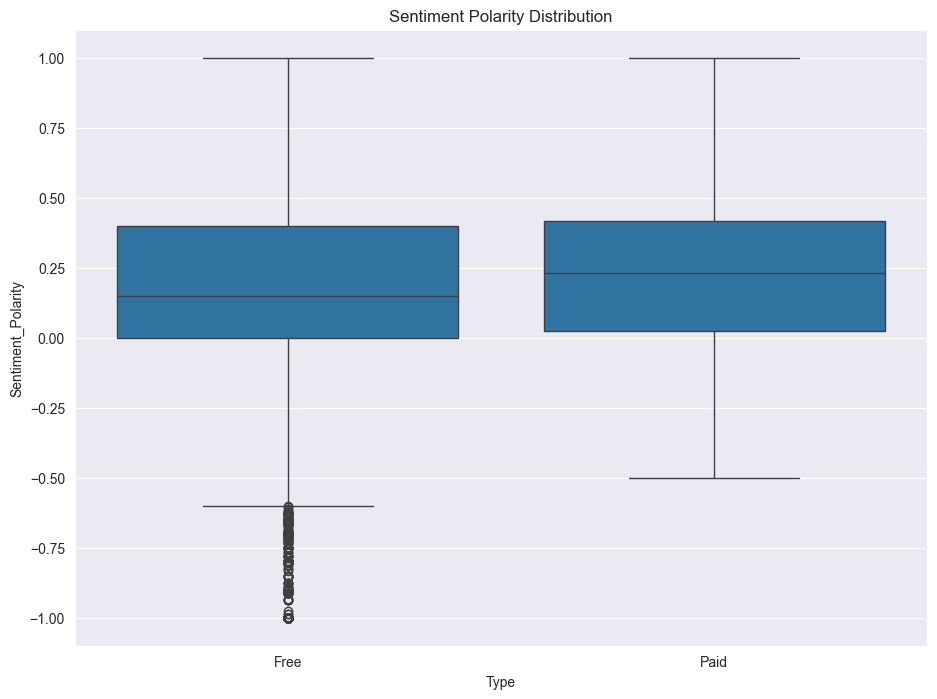

In [82]:
plt.show()